### Testing environment

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.10"):
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.22.4", 'matplotlib': "3.5.2",'sklearn': "1.1.1", 
                'pandas': "1.4.2",'xgboost': "1.5.1", 'shap': "0.40.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.10.5

[ OK ] numpy version 1.22.4 is installed.
[ OK ] matplotlib version 3.5.2 is installed.
[ OK ] sklearn version 1.1.1 is installed.
[ OK ] pandas version 1.4.2 is installed.
[ OK ] xgboost version 1.5.1 is installed.


/Users/burkeobrien/opt/anaconda3/envs/ds_env/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[ OK ] shap version 0.40.0 is installed.


### Importing dataset

In [2]:
# Import packages

import pandas as pd
import numpy as np
from matplotlib import pylab as plt
import seaborn as sb
import dataframe_image as dfi



In [3]:
df = pd.read_csv("../data/audi.csv")

### EDA

In [4]:
print(df.shape)
df.info(verbose=True)

(10668, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


**Check for missing values**

In [5]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

**Describe Target Feature**
We will be predicting list price, but there are lots of other interesting approaches to this dataset. Price is a continuous feature, which makes this a regression problem.

In [6]:
d = pd.DataFrame(df['price'].describe())
print(d)
dfi.export(d, "../figures/Tables/price_description_table.png")

               price
count   10668.000000
mean    22896.685039
std     11714.841888
min      1490.000000
25%     15130.750000
50%     20200.000000
75%     27990.000000
max    145000.000000


objc[94872]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb59a1b948) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x110e0d668). One of the two will be used. Which one is undefined.
[1017/162522.800679:INFO:headless_shell.cc(660)] Written to file /var/folders/0r/d390l7l966lbz2f5k72v_24h0000gn/T/tmptkd333uo/temp.png.


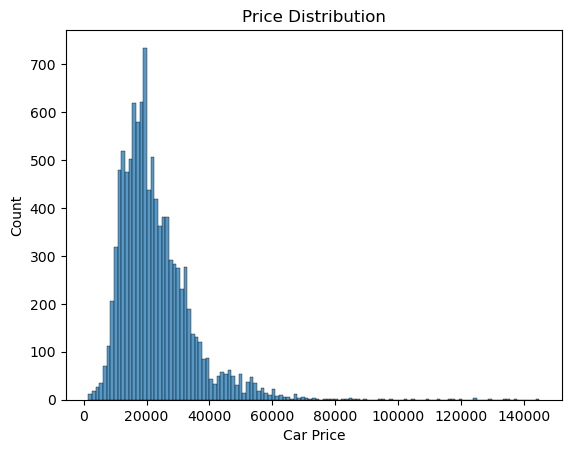

In [7]:
fig = sb.histplot(df['price']).get_figure()
plt.xlabel('Car Price')
plt.title('Price Distribution')
plt.savefig('../figures/price_histogram.png')

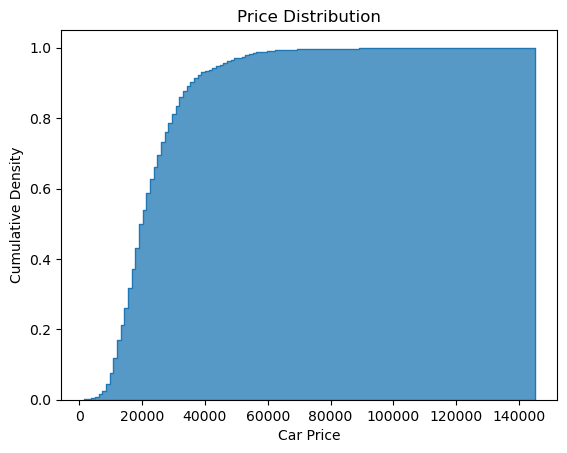

In [8]:
sb.histplot(df['price'], cumulative = True, stat="density", fill = 'False', element="step")
plt.xlabel('Car Price')
plt.ylabel('Cumulative Density')
plt.title('Price Distribution')
plt.savefig('../figures/cumulative_price.png')

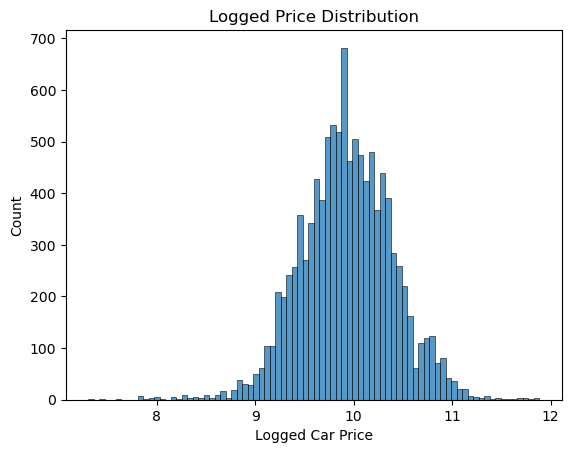

In [9]:
sb.histplot(np.log(df['price']))
plt.xlabel('Logged Car Price')
plt.title('Logged Price Distribution')
plt.savefig('../figures/log_price_histogram.png')

**Categorical Feature Descriptions**
There are three categorical features: model, transmission, and fuelType. For each category I check the distribution and how they relate to my target variable.

In [10]:
len(df['model'].value_counts())

26

In [11]:
df['model'].value_counts() 

 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 A2        1
 RS7       1
Name: model, dtype: int64

In [12]:
df.groupby('model').mean()

,year,price,mileage,tax,mpg,engineSize
model,,,,,,
A1,2016.626578,14327.750557,24498.288048,77.171492,58.674239,1.363920
A2,2003.000000,2490.000000,100000.000000,30.000000,65.700000,1.400000
A3,2016.713323,17408.522032,28891.087092,95.383618,56.955106,1.641472
A4,2016.997104,20255.450398,29690.989862,110.304127,54.360391,2.013541
A5,2017.314059,23577.114512,23515.295918,139.427438,50.395238,2.075397
A6,2016.684492,22695.385027,35005.590909,115.160428,54.341578,2.220588
A7,2016.778689,28865.516393,27480.942623,158.606557,47.072131,2.950820
A8,2017.194915,34981.847458,18256.872881,173.135593,43.949153,3.092373
Q2,2018.423358,22516.975669,10797.816302,142.408759,47.843187,1.522749


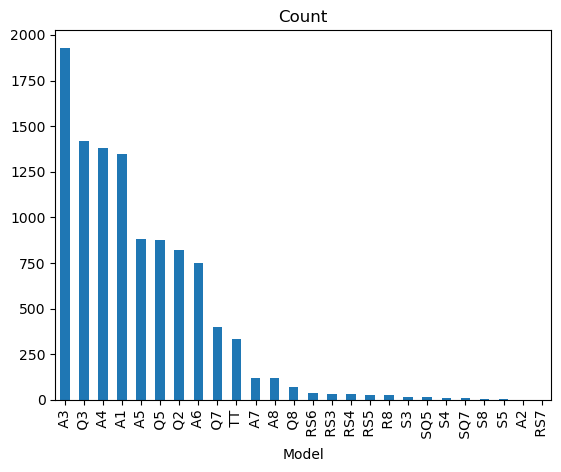

In [13]:
df['model'].value_counts().plot(kind='bar') 
plt.xlabel('Model')
plt.title('Count')
plt.savefig('../figures/car_model_counts.png')

In [14]:
d = pd.DataFrame(df['transmission'].value_counts() / len(df))
d.columns = ['Frequency']
dfi.export(d, "../figures/Tables/transmission_frequency_table.png")

objc[94889]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb59a1b948) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x10ee7b668). One of the two will be used. Which one is undefined.
[1017/162524.308272:INFO:headless_shell.cc(660)] Written to file /var/folders/0r/d390l7l966lbz2f5k72v_24h0000gn/T/tmps6e267vc/temp.png.


In [32]:
df.groupby('transmission').mean()

,year,price,mileage,tax,mpg,engineSize
transmission,,,,,,
Automatic,2017.510340,28204.750000,21359.902880,149.411004,46.214660,2.187038
Manual,2016.393912,16101.033417,30981.888075,97.119478,56.758801,1.635523
Semi-Auto,2017.651629,27161.781676,19953.927318,143.517126,46.918992,2.096547


In [16]:
df['fuelType'].value_counts() / len(df)

Diesel    0.522778
Petrol    0.474597
Hybrid    0.002625
Name: fuelType, dtype: float64

In [33]:
df.groupby('fuelType').mean()

,year,price,mileage,tax,mpg,engineSize
fuelType,,,,,,
Diesel,2016.846692,23237.516227,30220.968263,119.656625,54.240237,2.144379
Hybrid,2017.428571,30191.750000,28887.892857,72.678571,150.221429,1.714286
Petrol,2017.378629,22480.908355,18863.487656,133.306340,46.397511,1.696544


**Continuous Features**<br>
There are 5 continuous features: year, mileage, tax, mpg, and engineSize. For each I check the distribution and its relation with price

In [17]:
d = pd.DataFrame(df['year'].describe())
d.columns = ['Year']
dfi.export(d, "../figures/Tables/describe_year_table.png")

objc[94900]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb59a1b948) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x1106af668). One of the two will be used. Which one is undefined.
[1017/162525.049398:INFO:headless_shell.cc(660)] Written to file /var/folders/0r/d390l7l966lbz2f5k72v_24h0000gn/T/tmp5b2gracj/temp.png.


<AxesSubplot:xlabel='year', ylabel='Count'>

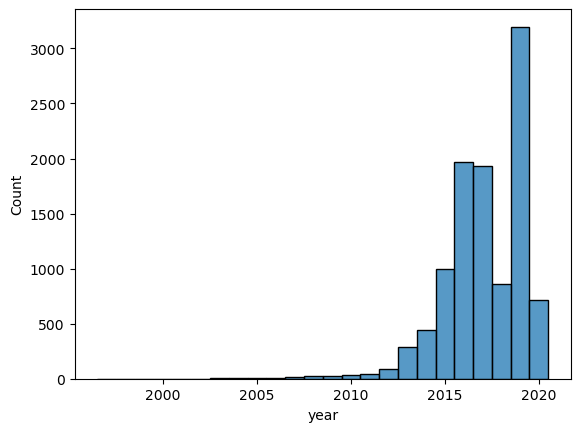

In [18]:
sb.histplot(df['year'], discrete = True)
plt.xlabel('Year')
plt.title('Count')
plt.savefig('../figures/car_year_counts.png')

In [19]:
d = pd.DataFrame(df['mileage'].describe())
d.columns = ['Mileage']
dfi.export(d, "../figures/Tables/describe_mileage_table.png")

objc[94910]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb59a1b948) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x10ebeb668). One of the two will be used. Which one is undefined.
[1017/162525.799270:INFO:headless_shell.cc(660)] Written to file /var/folders/0r/d390l7l966lbz2f5k72v_24h0000gn/T/tmpb73c7tww/temp.png.


<AxesSubplot:xlabel='mileage', ylabel='Count'>

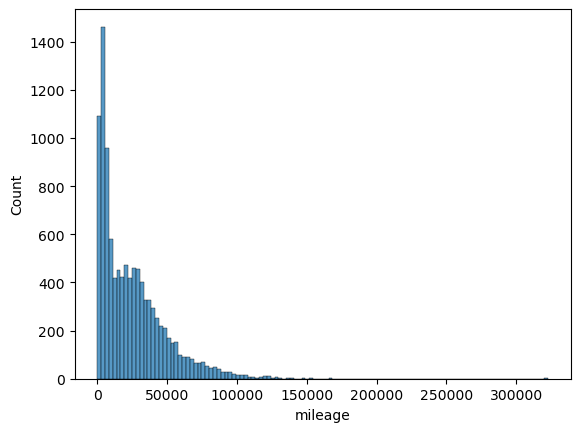

In [20]:
sb.histplot(df['mileage'])
plt.xlabel('Mileage')
plt.title('Mileage Distribution')
plt.savefig('../figures/mileage_counts.png')

<AxesSubplot:xlabel='mileage', ylabel='Count'>

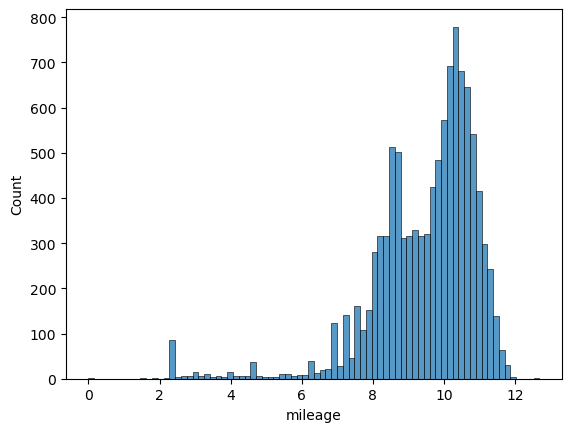

In [21]:
sb.histplot(np.log(df['mileage']))
plt.xlabel('Logged Mileage')
plt.ylabel('Count')
plt.title('Logged Mileage Distribution')
plt.savefig('../figures/logged_mileage_counts.png')

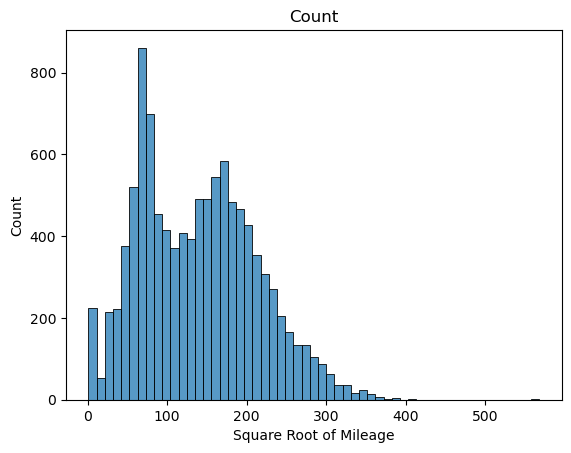

In [35]:
sb.histplot(np.sqrt(df['mileage']))
plt.xlabel('Square Root of Mileage')
plt.ylabel('Count')
plt.title('Mileage square root Distribution')
plt.savefig('../figures/sqrt_mileage_counts.png')

In [22]:
df['tax'].describe()

count    10668.000000
mean       126.011436
std         67.170294
min          0.000000
25%        125.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64

<AxesSubplot:xlabel='tax', ylabel='Count'>

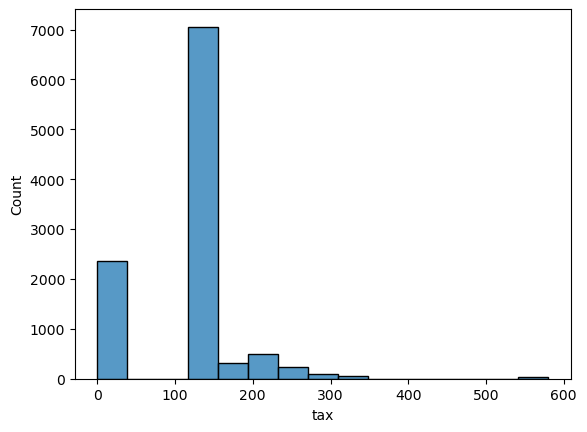

In [23]:
sb.histplot(df['tax'], bins = 15)
plt.xlabel('Tax Distribution')
plt.ylabel('Count')
plt.title('Tax Distribution')
plt.savefig('../figures/tax_distribution.png')

In [24]:
df['engineSize'].describe()

count    10668.000000
mean         1.930709
std          0.602957
min          0.000000
25%          1.500000
50%          2.000000
75%          2.000000
max          6.300000
Name: engineSize, dtype: float64

<AxesSubplot:xlabel='engineSize', ylabel='Count'>

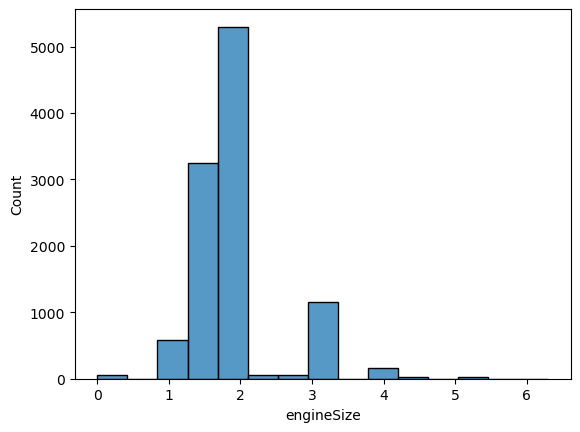

In [25]:
sb.histplot(df['engineSize'], bins = 15)
plt.xlabel('Engine Size Distribution')
plt.ylabel('Count')
plt.title('Engine Size Distribution')
plt.savefig('../figures/engine_size_distribution.png')

**Relations between features**

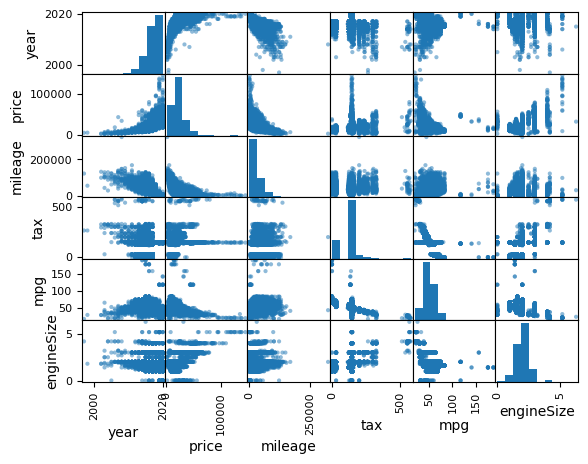

In [37]:
#df2 = df
#df2['price'] = np.log(df2['price'] )
pd.plotting.scatter_matrix(df)
#plt.xlabel('Tax Distribution')
#plt.ylabel('Count')
#plt.title('Scatter Matrix')
plt.savefig('../figures/scatter_matrix.png')

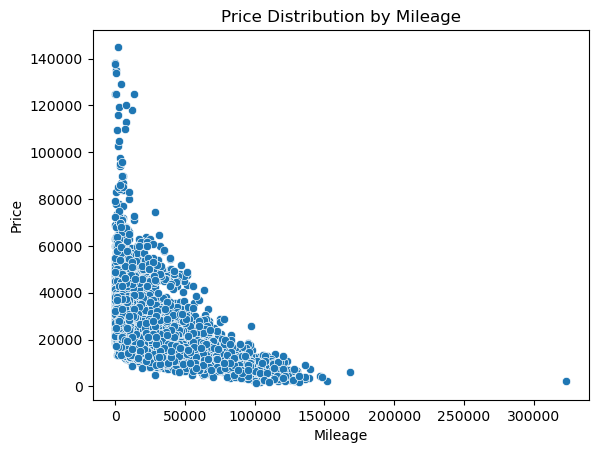

In [27]:
sb.scatterplot(df, x='mileage', y = 'price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Price Distribution by Mileage')
plt.savefig('../figures/price_by_mileage.png')

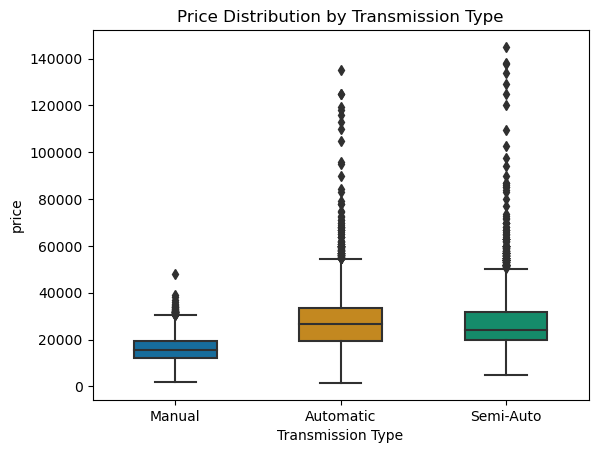

In [28]:
sb.boxplot(df[['price','transmission']], x = 'transmission', y = 'price', palette = 'colorblind', width = .5)
plt.xlabel('Transmission Type')
plt.title('Price Distribution by Transmission Type')
plt.savefig('../figures/price_by_transmission.png')

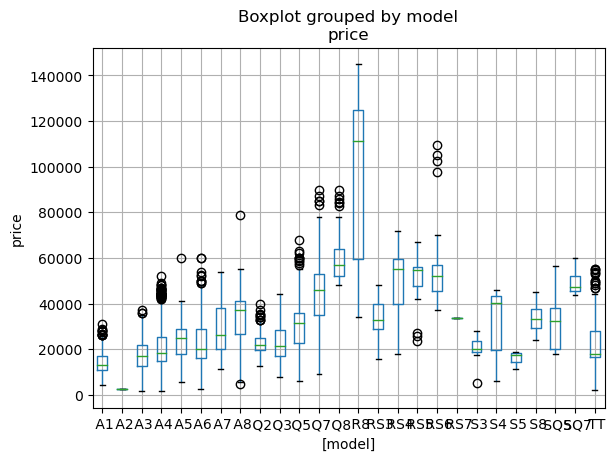

In [29]:
df[['price','model']].boxplot(by='model')
plt.xlabel('Car Model')
plt.ylabel('Price')
plt.title('Price Distribution by Model')
plt.savefig('../figures/price_by_model_distribution.png')
plt.show()

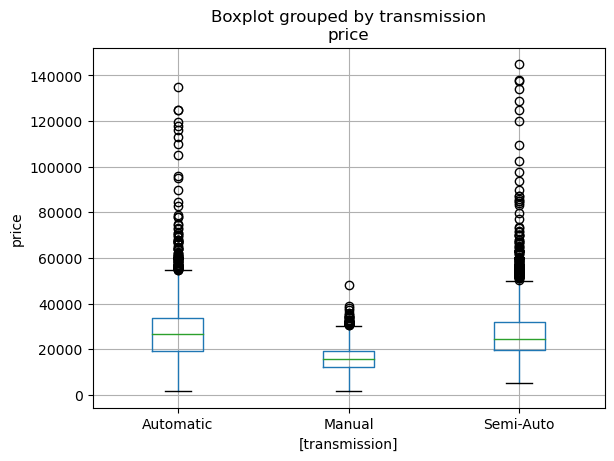

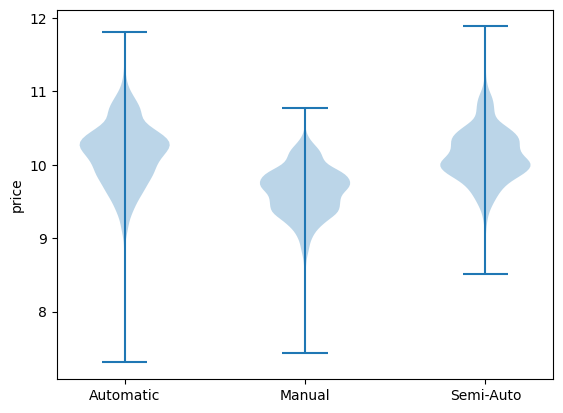

In [30]:
df[['price','transmission']].boxplot(by='transmission')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.title('Price Distribution by Model')
plt.savefig('../figures/price_by_transmission_distribution.png')
plt.show()

dataset = [np.log(df[df['transmission']=='Automatic']['price'].values),
           np.log(df[df['transmission']=='Manual']['price'].values),
           np.log(df[df['transmission']=='Semi-Auto']['price'].values)]

plt.violinplot(dataset = dataset)
plt.xticks([1,2, 3],['Automatic','Manual','Semi-Auto'])
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.title('Price Distribution by Model')
plt.savefig('../figures/price_by_transmission_distribution_violin.png')
plt.show()

plt.show()

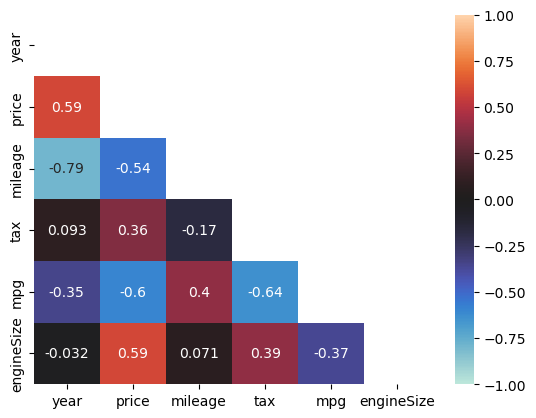

In [31]:
# check correlations before doing any encoding, feature engineering

corr_m = df.corr()
mask = np.triu(corr_m)

ax = sb.heatmap(corr_m, annot=True, center = 0,mask = mask, vmin = -1, vmax = 1)
plt.savefig('../figures/early_correlation_matrix.png')
